### import the required packages

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

### load the image data

In [9]:
dir_path = "E:\python\MLPractice\interactive_python\dogsAndCats\kagglecatsanddogs_5340\PetImages"

categories = ["Cat", "Dog"]

traing_data = []
for categorie in categories:
    path = os.path.join(dir_path, categorie)
    label = categories.index(categorie)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE)
        if not(img_array is None):
            new_array = cv2.resize(img_array, (50, 50))
        traing_data.append([new_array, label])

### EDA

In [10]:
len(traing_data)

25002

In [11]:
import random
random.shuffle(traing_data)

#### divide the data into the training and testing data set

In [12]:
train_images = []
train_labels = []
for (img , lab) in traing_data:
    train_images.append(img)
    train_labels.append(lab)

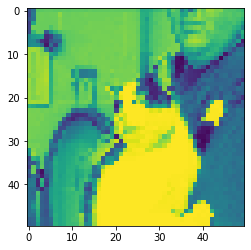

In [15]:
plt.imshow(train_images[0])

In [16]:
train_labels[0]

0

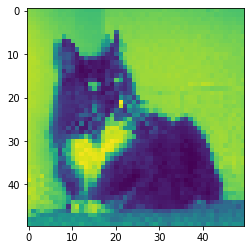

In [17]:
plt.imshow(train_images[14])

In [18]:
train_labels[14]

0

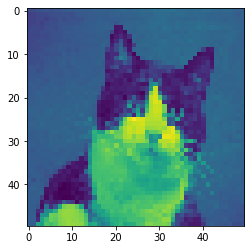

In [19]:
plt.imshow(train_images[12])

0


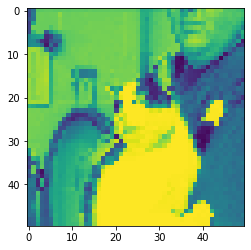

0


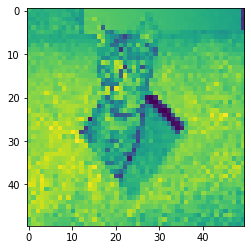

1


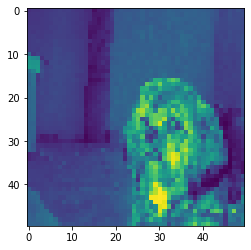

0


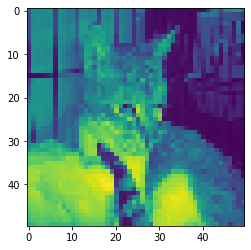

0


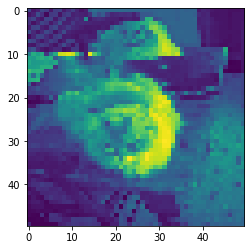

1


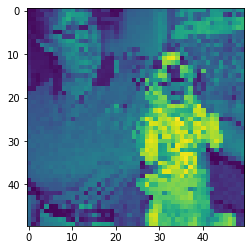

0


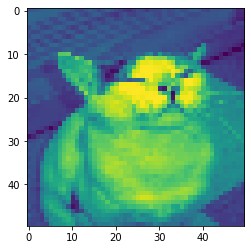

0


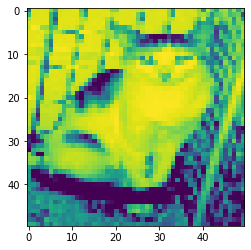

0


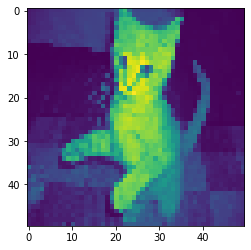

0


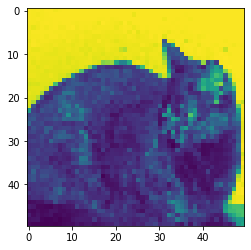

1


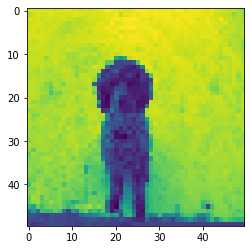

1


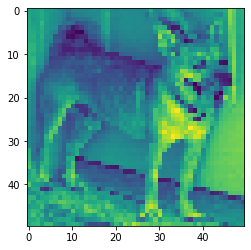

0


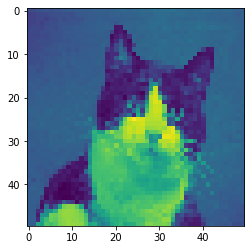

0


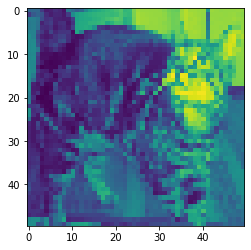

0


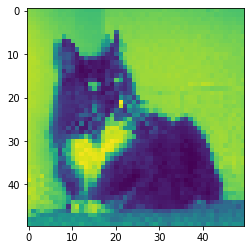

0


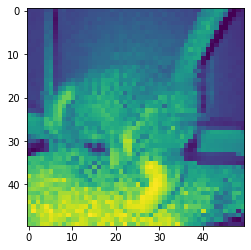

0


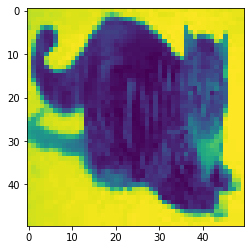

1


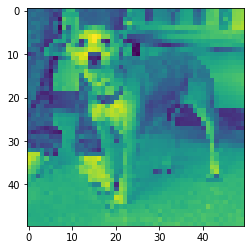

0


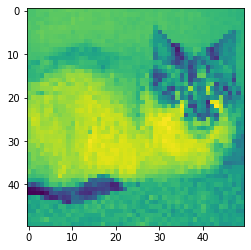

1


In [24]:
for index in range(20):
    plt.imshow(train_images[index])
    print(train_labels[index])
    plt.show()

In [22]:
sum(train_labels)

12501

In [23]:
train_labels[18]

0

### standardizing the data

In [25]:
train_images = np.array(train_images).reshape(-1, 50, 50, 1).astype('float32')/ 255
train_labels = np.array(train_labels)

### adding the dummy records

In [26]:
series = pd.Series(train_labels)
train_labels = pd.get_dummies(series)

In [34]:
print(train_labels)

       0  1
0      1  0
1      1  0
2      0  1
3      1  0
4      1  0
...   .. ..
24997  0  1
24998  0  1
24999  1  0
25000  0  1
25001  0  1

[25002 rows x 2 columns]


### creating and traing the model

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Activation
from tensorflow.keras.models import Sequential

model = Sequential()
# adding the convolutional layer
model.add(Conv2D(84, (3,3), input_shape=train_images.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), input_shape=train_images.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(2))
model.add(Activation("sigmoid"))


model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# traing the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
782/782 [==============================] - 136s 171ms/step - loss: 0.5995 - accuracy: 0.6734
Epoch 2/10
782/782 [==============================] - 131s 168ms/step - loss: 0.5091 - accuracy: 0.7519
Epoch 3/10
782/782 [==============================] - 130s 166ms/step - loss: 0.4664 - accuracy: 0.7820
Epoch 4/10
782/782 [==============================] - 131s 168ms/step - loss: 0.4397 - accuracy: 0.7953
Epoch 5/10
782/782 [==============================] - 132s 169ms/step - loss: 0.4131 - accuracy: 0.8115
Epoch 6/10
782/782 [==============================] - 131s 168ms/step - loss: 0.3836 - accuracy: 0.8255
Epoch 7/10
782/782 [==============================] - 131s 168ms/step - loss: 0.3653 - accuracy: 0.8355
Epoch 8/10
782/782 [==============================] - 132s 168ms/step - loss: 0.3472 - accuracy: 0.8477
Epoch 9/10
782/782 [==============================] - 132s 169ms/step - loss: 0.3319 - accuracy: 0.8533
Epoch 10/10
782/782 [==============================] - 133s 170m

### save the model

In [37]:
model.save("cat_dog_img_classification.model")

INFO:tensorflow:Assets written to: cat_dog_img_classification.model\assets


### Evaluating the model

In [38]:
model.predict(train_images[3])
print(train_labels[3])

ValueError: in user code:

    File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "conv2d_10" (type Conv2D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_8/conv2d_10/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_8/ExpandDims, sequential_8/conv2d_10/Conv2D/ReadVariableOp)' with input shapes: [?,50,1,1], [3,3,1,84].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 50, 1, 1), dtype=float32)
